<a href="https://colab.research.google.com/github/divyamehra17/Stock-Market-Prediction-And-Forecasting-Using-Stacked-LSTM/blob/main/Stock_Market_Prediction_And_Forecasting_Using_Stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
### keras and Tensorflow >2.0

In [4]:
import pandas_datareader as pdr


In [9]:
df = pdr.get_data_tiingo('AAPL', api_key="b5472674a76d10966e87ebe15f0ef17529106daa")

In [11]:
df.to_csv('AAPL.csv')

In [12]:
import pandas as pd

In [13]:
df=pd.read_csv('AAPL.csv')

In [14]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-10-06 00:00:00+00:00,113.89,114.34,113.13,113.70,28779313,26.697841,26.803329,26.519684,26.653302,115117252,0.0,1.0
1,AAPL,2016-10-07 00:00:00+00:00,114.06,114.56,113.51,114.31,24358443,26.737692,26.854901,26.608762,26.796297,97433772,0.0,1.0
2,AAPL,2016-10-10 00:00:00+00:00,116.05,116.75,114.72,115.02,36235956,27.204184,27.368276,26.892408,26.962733,144943824,0.0,1.0
3,AAPL,2016-10-11 00:00:00+00:00,116.30,118.69,116.20,117.70,64041043,27.262788,27.823046,27.239346,27.590973,256164172,0.0,1.0
4,AAPL,2016-10-12 00:00:00+00:00,117.34,117.98,116.75,117.35,37586787,27.506582,27.656610,27.368276,27.508927,150347148,0.0,1.0


In [15]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-09-28 00:00:00+00:00,141.91,144.750,141.6900,143.25,108972340,141.91,144.750,141.6900,143.25,108972340,0.0,1.0
1253,AAPL,2021-09-29 00:00:00+00:00,142.83,144.450,142.0300,142.47,74602044,142.83,144.450,142.0300,142.47,74602044,0.0,1.0
1254,AAPL,2021-09-30 00:00:00+00:00,141.50,144.378,141.2800,143.66,89056664,141.50,144.378,141.2800,143.66,89056664,0.0,1.0
1255,AAPL,2021-10-01 00:00:00+00:00,142.65,142.920,139.1101,141.90,94639581,142.65,142.920,139.1101,141.90,94639581,0.0,1.0
1256,AAPL,2021-10-04 00:00:00+00:00,139.14,142.210,138.2700,141.76,98322008,139.14,142.210,138.2700,141.76,98322008,0.0,1.0


In [16]:
df1=df.reset_index()['close']

In [17]:
df1


0       113.89
1       114.06
2       116.05
3       116.30
4       117.34
         ...  
1252    141.91
1253    142.83
1254    141.50
1255    142.65
1256    139.14
Name: close, Length: 1257, dtype: float64

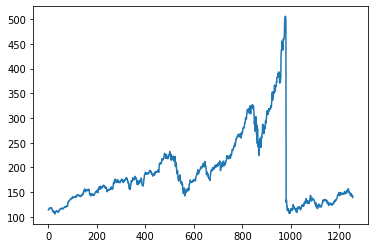

In [18]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [19]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [20]:
import numpy as np

In [21]:
df1

0       113.89
1       114.06
2       116.05
3       116.30
4       117.34
         ...  
1252    141.91
1253    142.83
1254    141.50
1255    142.65
1256    139.14
Name: close, Length: 1257, dtype: float64

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [23]:
print(df1)

[[0.02043059]
 [0.02085519]
 [0.02582547]
 ...
 [0.08939008]
 [0.09226235]
 [0.08349568]]


In [24]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [25]:
training_size,test_size

(817, 440)

In [26]:
train_data

array([[0.02043059],
       [0.02085519],
       [0.02582547],
       [0.02644987],
       [0.0290474 ],
       [0.02814826],
       [0.02977172],
       [0.02957191],
       [0.0293721 ],
       [0.02849793],
       [0.02834807],
       [0.02719916],
       [0.02982167],
       [0.03132025],
       [0.02467656],
       [0.02190419],
       [0.02000599],
       [0.01955642],
       [0.01443629],
       [0.01468605],
       [0.01029022],
       [0.00781757],
       [0.01173885],
       [0.01336231],
       [0.01291273],
       [0.00519506],
       [0.00679355],
       [0.        ],
       [0.00349668],
       [0.01068984],
       [0.01058994],
       [0.01086468],
       [0.01503572],
       [0.01521055],
       [0.0137869 ],
       [0.01518557],
       [0.0146361 ],
       [0.01436136],
       [0.01201359],
       [0.00944103],
       [0.01046506],
       [0.00849193],
       [0.01058994],
       [0.01328738],
       [0.01600979],
       [0.02058045],
       [0.01895699],
       [0.023

In [27]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [28]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [29]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [30]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [31]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [32]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [33]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 306ms/step - loss: 0.0119 - val_loss: 0.0314
Epoch 2/100
12/12 [==============================] - 2s 192ms/step - loss: 0.0031 - val_loss: 0.0243
Epoch 3/100
12/12 [==============================] - 2s 192ms/step - loss: 0.0015 - val_loss: 0.0202
Epoch 4/100
12/12 [==============================] - 2s 193ms/step - loss: 6.9995e-04 - val_loss: 0.0203
Epoch 5/100
12/12 [==============================] - 2s 189ms/step - loss: 4.9637e-04 - val_loss: 0.0253
Epoch 6/100
12/12 [==============================] - 2s 189ms/step - loss: 4.5592e-04 - val_loss: 0.0241
Epoch 7/100
12/12 [==============================] - 2s 193ms/step - loss: 4.2156e-04 - val_loss: 0.0220
Epoch 8/100
12/12 [==============================] - 2s 192ms/step - loss: 4.1729e-04 - val_loss: 0.0224
Epoch 9/100
12/12 [==============================] - 2s 193ms/step - loss: 3.8256e-04 - val_loss: 0.0235
Epoch 10/100
12/12 [==============================] - 2s 193ms/step

In [37]:
import tensorflow as tf

In [38]:
tf.__version__

'2.6.0'

In [39]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [40]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [41]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

188.12388211802315

In [42]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

223.79474090300047

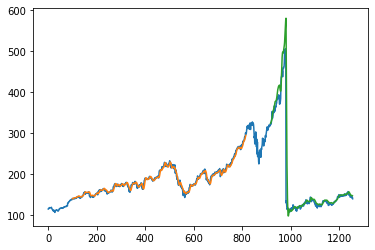

In [43]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [44]:
len(test_data)

440

In [45]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [46]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [47]:
temp_input

[0.054298416504320934,
 0.05135121634447276,
 0.04780458564363854,
 0.04740496528298116,
 0.05394874868874572,
 0.04925320945102157,
 0.05342424696538289,
 0.05292472151456118,
 0.05279984015185574,
 0.048878565362905246,
 0.047205155102652496,
 0.04638093810879668,
 0.04832908736700137,
 0.04453269394075632,
 0.0504021179879115,
 0.05042709426045261,
 0.0525251011539038,
 0.05349917578300617,
 0.05095159598381538,
 0.05404865377891005,
 0.06186622708426992,
 0.05976822019081868,
 0.061042010090414156,
 0.0651381187871522,
 0.06181627453918781,
 0.06641190868674762,
 0.07060792247365,
 0.06990858684249962,
 0.06918427493880813,
 0.06843498676257559,
 0.07260602427693691,
 0.07647734652080529,
 0.07805085169089365,
 0.07882511613966736,
 0.08554373345321947,
 0.09068884559668317,
 0.09705779509466006,
 0.09373595084669567,
 0.09840651381187876,
 0.09688296118687245,
 0.09973025625655624,
 0.10849692791847748,
 0.10682351765822468,
 0.1016034766971377,
 0.09176282531594981,
 0.1010040461

In [60]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=50
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input  = x_input.reshape((1, n_steps,1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

ValueError: ignored

In [51]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [52]:
len(df1)

1257

ValueError: ignored

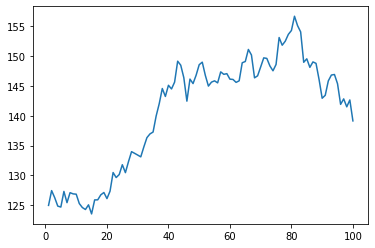

In [59]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

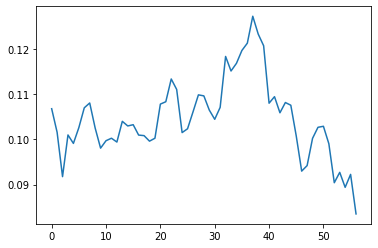

In [54]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [55]:
df3=scaler.inverse_transform(df3).tolist()

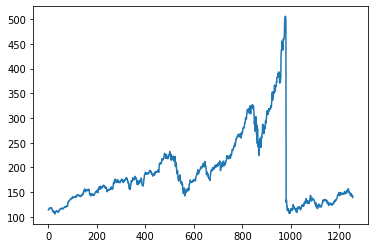

In [56]:

plt.plot(df3)
